In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data = pd.read_csv(r"C:\Users\DELL\Downloads\survey_data (1).csv.crdownload")

In [7]:
duplicates = data.duplicated().sum()
print(duplicates)

0


In [9]:
duplicated_rows = data[data.duplicated()]
print(duplicated_rows.head())

Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith, OfficeStackAsyncAdmired, OfficeStackSyncHaveWorkedWith, OfficeStackSyncWan

In [21]:
duplicates = data.duplicated(subset=['MainBranch','Employment','RemoteWork']).sum()
print('duplicate rows-', duplicates)

duplicate rows- 2721


In [23]:
duplicated_rows = data[data.duplicated(subset=['MainBranch','Employment','RemoteWork'], keep=False)]
print(duplicated_rows.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [25]:
duplicate_subset = data[data.duplicated(subset=['MainBranch', 'Employment', 'RemoteWork'], keep=False)]
identical_counts = duplicate_subset.nunique()
identical_columns = identical_counts[identical_counts == 1]  # Columns with only one unique value
print("Columns that frequently contain identical values within duplicate rows:")
print(identical_columns.index.tolist())

Columns that frequently contain identical values within duplicate rows:
['Check']


C:\Users\DELL\AppData\Local\Temp\ipykernel_1420\3407254179.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=duplicated_rows['MainBranch'], order=duplicated_rows['Country'].value_counts().index, palette='viridis')


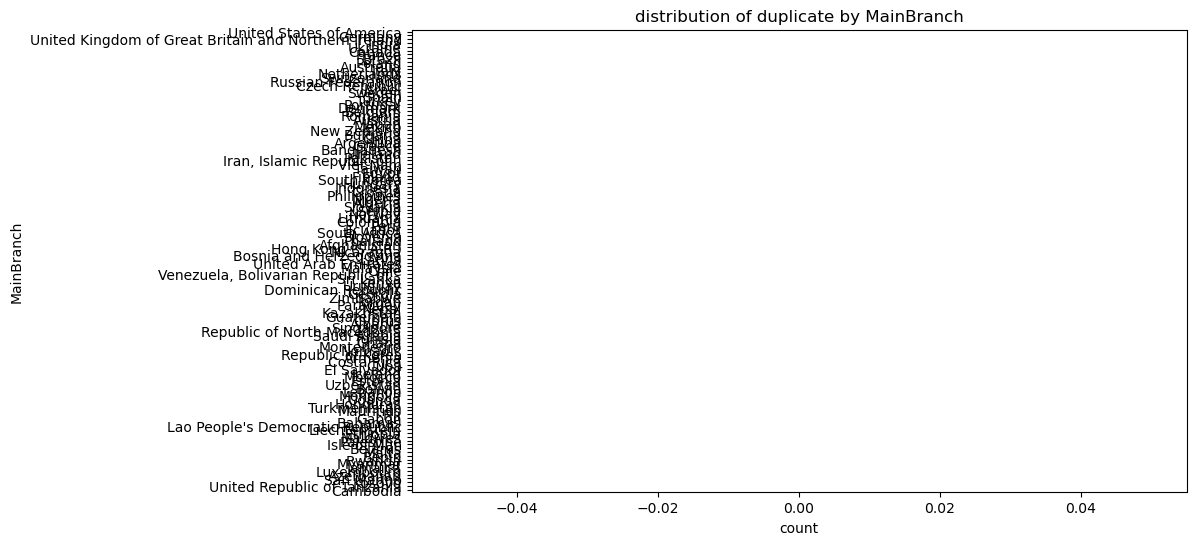

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(y=duplicated_rows['MainBranch'], order=duplicated_rows['Country'].value_counts().index, palette='viridis')
plt.title('distribution of duplicate by MainBranch')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_1420\2745717330.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=duplicated_rows['Country'], order=duplicated_rows['Country'].value_counts().index, palette='viridis')


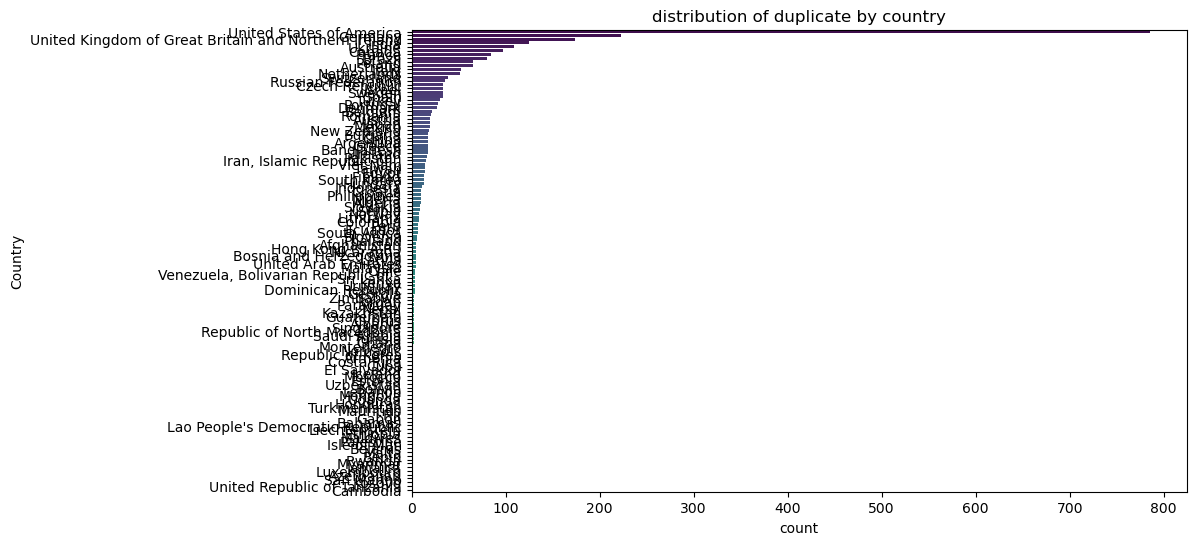

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(y=duplicated_rows['Country'], order=duplicated_rows['Country'].value_counts().index, palette='viridis')
plt.title('distribution of duplicate by country')
plt.show()

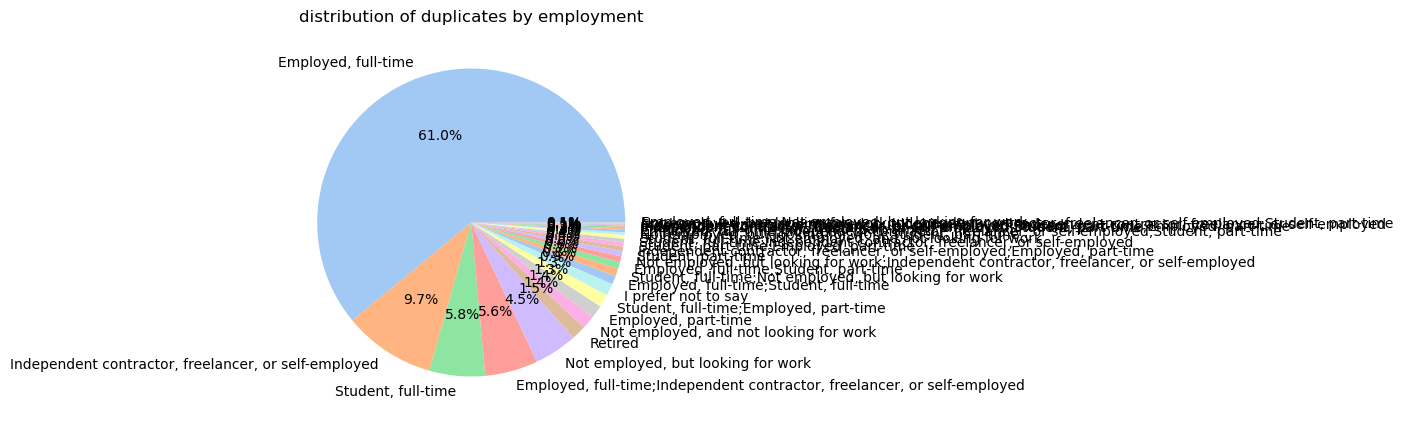

In [29]:
plt.figure(figsize=(8,5))
duplicated_rows['Employment'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.ylabel('')
plt.title('distribution of duplicates by employment')
plt.show()

In [35]:
unique_counts = data.nunique()
print(unique_counts)

ResponseId             2892
MainBranch                5
Age                       8
Employment               43
RemoteWork                3
                       ... 
JobSatPoints_11          31
SurveyLength              3
SurveyEase                3
ConvertedCompYearly     806
JobSat                   11
Length: 114, dtype: int64


In [37]:
critical_columns = unique_counts[unique_counts > (0.9 * len(data))].index.tolist()
print("Critical columns for defining uniqueness:", critical_columns)

Critical columns for defining uniqueness: ['ResponseId']


In [39]:
data_cleaned = data.drop_duplicates(subset=['MainBranch', 'Employment', 'RemoteWork'], keep='first')
print("Shape after removing duplicates:", data_cleaned.shape)

Shape after removing duplicates: (171, 114)


## Documenting the Process of Identifying and Removing Duplicates
The process involves-
Identifying duplicate rows: Checking for completely identical rows using data.duplicated().sum().
Analyzing uniqueness: Evaluating unique values in each column to determine key columns.
Selecting key columns: Choosing columns that best define uniqueness, avoiding unnecessary data loss.
Removing duplicates: Using drop_duplicates(subset=[...]) to eliminate redundant records based on selected columns.
This approach ensures that duplicates are removed efficiently and meaningfully, preserving data integrity.

## Reasoning Behind Selecting Specific Columns for Identifying and Removing Duplicates
Relevance: Columns like User ID, Email, or Transaction ID are often unique identifiers, making them critical for defining uniqueness.
Data Preservation: Removing full-row duplicates may result in the loss of useful variations in other columns (e.g., salary, timestamps).
Reducing Redundancy: Selecting key columns ensures that only unnecessary duplicate records are removed while maintaining meaningful data points.
This method balances data cleaning and information retention, ensuring accurate analysis and decision-making. 